# Machine Learning Project

# I. Introduction

Sequence classification is a type of predictive problem where we try to predict the category of a sequence of inputs over space or time. It is a hard task because the inputs can vary in length, the set of words (vocabulary) can be vary large and the model may want to understand the long-term context of a sequence.

## Description of the dataset

We will demonstrate sequence learning through a twitter sentiment analysis classification problem. Each tweet are short messages of varied length of words and the task is to build a classifier that can correctly predict the sentiment of each tweet.
Our dataset contains more than 1.2 million tweets, equally split in positive and negative messages. 

## Approach

We will approach this classification task by first getting an overlook of the dataset and the kind of messages we have at hand. Then we will apply some NLP techniques to transform our data into numerical objects (embedding) which we will feed into various Machine Learning Models. From Logistic Regressions to Deep Learning models, we will compare them and create a benchmark of various Supervised models for this classification task.

## Import

### Libraries and modules

In [2]:
import numpy as np
import pandas as pd
from Functions import GridSearch_, make_results

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(font_scale=1.3)
sns.set(style="darkgrid")

# Machine Learning
## Tools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
## Models
from sklearn.ensemble import RandomForestClassifier

### Dataset

In [3]:
emote = pd.read_csv("data/MLUnige2021_train.csv",usecols=['emotion', 'user', 'text'])
emote_50 = emote[:50000]   #  50.000 first obs
emote_100 = emote[:100000] # 100.000 first obs
emote_320 = emote[:320000] #  about 1/4 of obs

results = pd.DataFrame()

## Random Forest

Random Forest is a machine learning algorithm that is commonly used for both classification and regression tasks. It is an ensemble learning method, meaning it builds multiple decision trees during training and merges them together to get a more accurate and stable prediction.

Here's how Random Forest works for classification:

- **Bootstrapping (Random Sampling with Replacement)**: The algorithm starts by creating multiple random subsets of the training data through a process called bootstrapping. Each subset is used to train a decision tree.

- **Decision Tree Construction**: For each subset of data, a decision tree is constructed. Decision trees are built by recursively splitting the data based on features, aiming to maximize the information gain or decrease in impurity at each node.

- **Voting**: Once all the decision trees are trained, they make predictions on new data. For classification tasks, each tree "votes" for a class, and the class with the majority of votes becomes the predicted class for the Random Forest.

- **Aggregation**: The final prediction is determined by aggregating the individual predictions from all the trees. For classification, this often involves selecting the class with the highest number of votes.

The key idea behind Random Forest is that by combining multiple decision trees trained on different subsets of data, the model tends to be more robust and less prone to overfitting compared to individual decision trees. Additionally, Random Forest can handle a large number of features, provides a measure of feature importance, and is relatively easy to use with minimal hyperparameter tuning.

The "random" in Random Forest comes from two sources of randomness: random sampling of data points (bootstrapping) and random subsets of features considered at each split in the decision tree construction process. This helps to decorrelate the individual trees and create a diverse set of models, leading to a more accurate and robust ensemble.

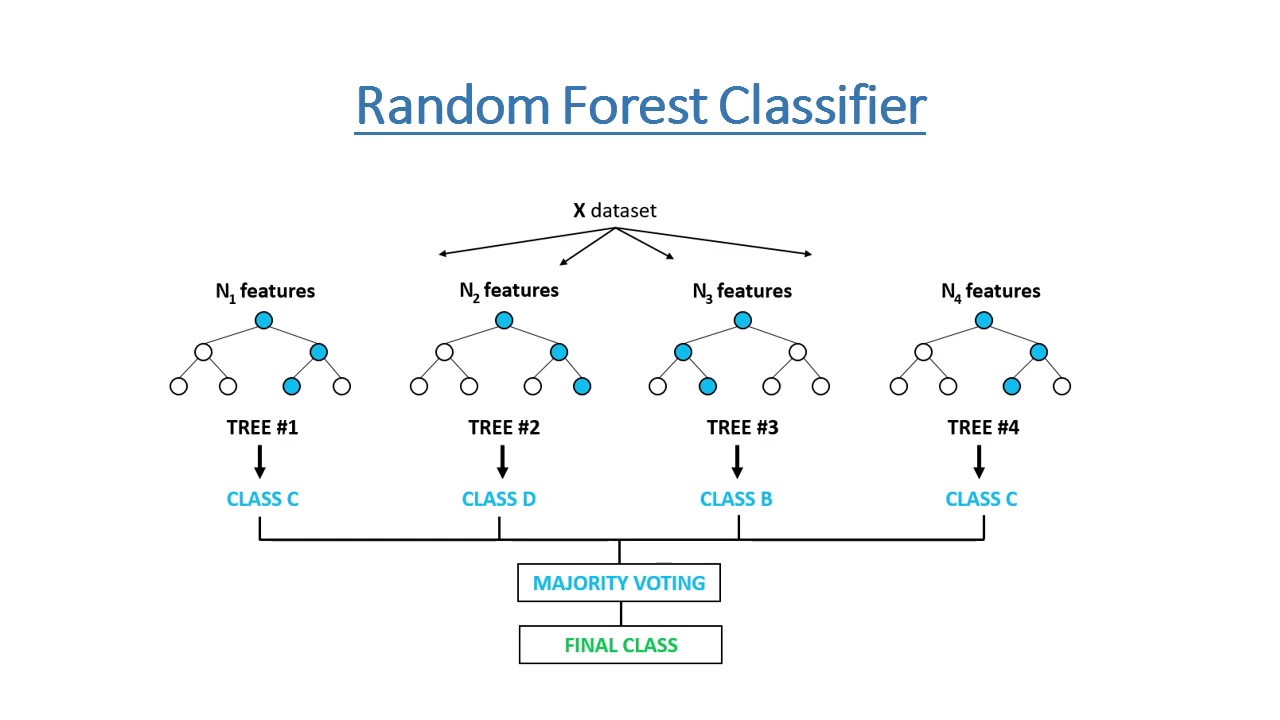

In [79]:
# Define the train and test sets (50 000 observations)
data = emote_50
X_train, X_test, y_train, y_test = train_test_split((data.text + data.user), data.emotion, test_size=0.2, random_state=37)

# Define the parameters to tune
parameters_rf = {
    # 'vect__max_df': (0.4, 0.5),
    #'vect__max_features': (None, 200000, 400000),
    #'vect__ngram_range': ((1,2),(1,3),),
    'model__max_features': ('sqrt','log2'),       # default: sqrt 
    'model__n_estimators': (100, 500,),                  # default: 100
    'model__criterion': ('gini', 'entropy', 'log_loss'),   # default: gini
    'model__max_depth': ('None', 1000,),             # default: None
    'model__min_samples_leaf': (1, 5, 10)            # default: 1
}

# Perform the grid search
gs = GridSearch_(X_train, 
                 y_train, 
                 parameters = parameters_rf, 
                 model = RandomForestClassifier())

# Prediction with best parameters
y_pred = gs.predict(X_test)

# Confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat,
            fmt='d', 
            cbar=False,
            annot=True, 
            #square=True, 
            cmap=plt.cm.Blues,
            xticklabels=('Negative','Positive'),
            yticklabels=('Negative','Positive')
           )
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix');

# Save results
rf_50_cv_results = make_results('rf', '50', gs, 'accuracy')
results = pd.concat([results, rf_50_cv_results], axis=0)

"# Define the train and test sets (50 000 observations)\ndata = emote_50\nX_train, X_test, y_train, y_test = train_test_split((data.text + data.user), data.emotion, test_size=0.2, random_state=37)\n\n# Define the parameters to tune\nparameters_rf = {\n    # 'vect__max_df': (0.4, 0.5),\n    #'vect__max_features': (None, 200000, 400000),\n    #'vect__ngram_range': ((1,2),(1,3),),\n    'model__max_features': ('sqrt','log2'),       # default: sqrt \n    'model__n_estimators': (100, 500,),                  # default: 100\n    'model__criterion': ('gini', 'entropy', 'log_loss'),   # default: gini\n    'model__max_depth': ('None', 1000,),             # default: None\n    'model__min_samples_leaf': (1, 5, 10)            # default: 1\n}\n\n# Perform the grid search\ngs = GridSearch_(X_train, \n                 y_train, \n                 parameters = parameters_rf, \n                 model = RandomForestClassifier())\n\n# Prediction with best parameters\ny_pred = gs.predict(X_test)\n\n# Confusi

# IV. Results

Here is a benchmark of all the models accuracy performance:

In [7]:
data = {'model': ['log', 'log', 'log', 'log', 'mnb', 'mnb', 'mnb', 'mnb', 'svm', 'svm', 'svm', 'svm'], 
        'size': ['50', '100', '320', 'all', '50', '100', '320', 'all', '50', '100', '320', 'all'], 
        'accuracy':[0.770, 0.785, 0.803, 0.821, 0.763, 0.778, 0.792, 0.810, 0.780, 0.794, 0.811, 0.828]}
results_ = pd.DataFrame.from_dict(data)

<Figure size 500x500 with 0 Axes>

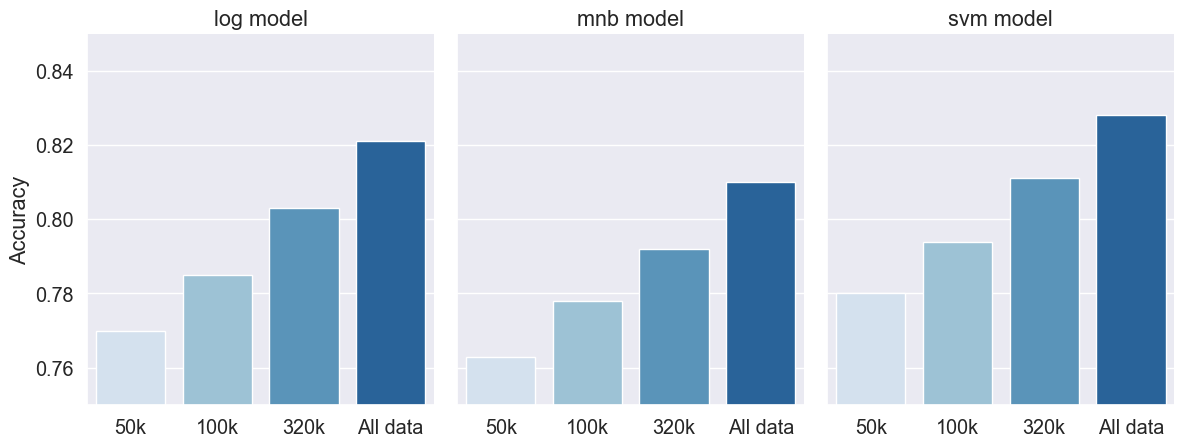

In [45]:
plt.figure(figsize=(5, 5))
g = sns.catplot(x='size',
                y='accuracy',
                col='model',
                data=results_,
                kind='bar',
                palette="Blues",
                height=5,
                aspect=.8)
g.set_axis_labels("", "Accuracy")
g.set_xticklabels(["50k", "100k", "320k", 'All data'])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0.75, 0.85));